# 시도 1
최초의 시도로, 크롤링된 스팀 리뷰 데이터를 토대로 좋아하는 게임을 선택시 그와 비슷하다고 판단되는 게임 10개를 추천해주는 시스템이다.
스팀의 리뷰 데이터는 좋아요와 싫어요 두가지로, 좋아요는 1, 싫어요는 -1 그리고 리뷰되지 않은 경우 0으로 표현된다.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import os

# Load Data

In [2]:
columns = ('appId', 'name')
df_games_names = pd.concat([pd.read_csv('page{}_games.csv'.format(i), usecols=[1, 2], names=columns) for i in range(1, 6)])

df_games_names

,appId,name
0,271590,Grand Theft Auto V
1,1174180,Red Dead Redemption 2
2,1145360,Hades
3,715950,Divinity: Original Sin 2
4,391540,Undertale
...,...,...
11,1237970,Titanfall 2
12,584400,Sonic Mania
13,268500,XCOM 2
14,412830,STEINS;GATE


In [3]:
columns = ('appId', 'user', 'rating', 'hours')
df_reviews = pd.concat([pd.read_csv('page{}_reviews.csv'.format(i), usecols=[0, 3, 6, 7], names=columns) for i in range(1, 6)])

df_reviews

,appId,user,rating,hours
0,1145360,76561198059680994,1,48.3
1,1145360,lalaso123,1,23.2
2,1145360,76561198008088676,1,5.1
3,1145360,YogurtRed,1,11.4
4,1145360,76561199095470163,1,22.8
...,...,...,...,...
142106,809230,7.65612E+16,1,41.6
142107,809230,7.65612E+16,1,63.6
142108,809230,7.65612E+16,1,19.1
142109,809230,7.65612E+16,1,136.6


## 중복값 및 미확인 유저명 처리

In [4]:
indexNames = df_reviews[df_reviews['user'] == '#NAME?' ].index
df_reviews.drop(indexNames , inplace=True)
df_unique_reivews = df_reviews.drop_duplicates(subset=['appId', 'user'])

In [5]:
df_unique_reivews

,appId,user,rating,hours
0,1145360,76561198059680994,1,48.3
1,1145360,lalaso123,1,23.2
2,1145360,76561198008088676,1,5.1
3,1145360,YogurtRed,1,11.4
4,1145360,76561199095470163,1,22.8
...,...,...,...,...
142071,809230,bhollowa123,1,393.7
142077,809230,MessedUpHare,1,3.4
142079,809230,milkmouf,-1,0.9
142080,809230,Octavian1453,1,125.4


## 게임별 리뷰 분포 확인

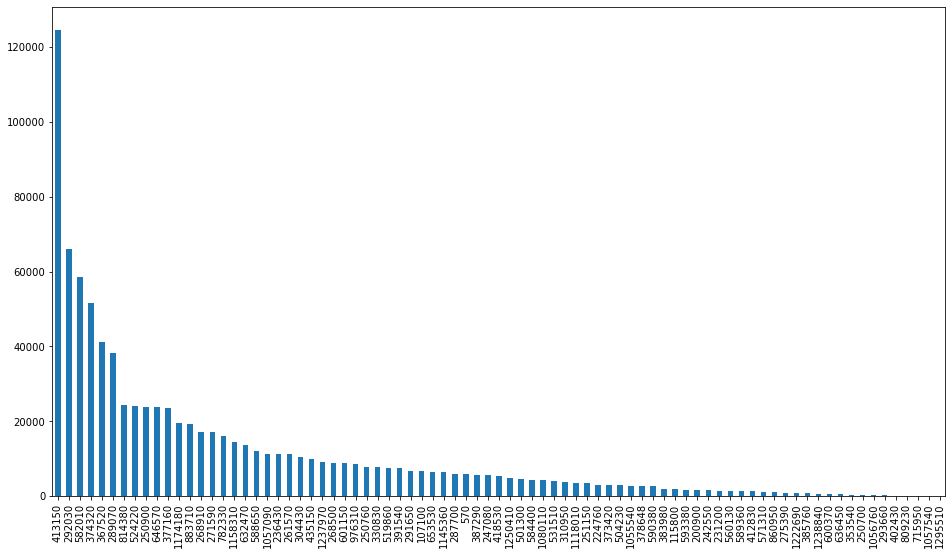

In [6]:
df_unique_reivews.appId.value_counts().plot(kind='bar', figsize=(16,9))

In [7]:
df_unique_reivews.appId.value_counts().describe()

count        81.000000
mean      10831.567901
std       18149.492830
min          44.000000
25%        1482.000000
50%        5487.000000
75%       11227.000000
max      124515.000000
Name: appId, dtype: float64

In [8]:
df_games_users = df_unique_reivews.pivot(
    index='appId',
    columns='user',
    values='rating'
).fillna(0)

df_games_users

user,NaN,----------------,----------k----------,-------l,-----Aria-----,----Werewolf---,---Ark---,---DMK---,---Oni---,--Banri--,...,zzzxggg,zzzxxxzzzxxx,zzzyim,zzzyrs,zzzzzzaaaaaaaaaaaaaaaaa,zzzzzzzzhou,zzzzzzzzzx_x,zzzzzzzzzzz111,zzzzzzzzzzz55555,zzzzzzzzzzzzzzzzzzz12
appId,,,,,,,,,,,,,,,,,,,,,
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
hashmap = {appId: i for i, appId in enumerate(list(df_games_users.index))}

In [10]:
from scipy.sparse import csr_matrix

sparse_mat_games_users = csr_matrix(df_games_users.values)

# K-Nearest Neighbor

In [11]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

model.fit(sparse_mat_games_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

# Prediction Sample

In [12]:
distances, indices = model.kneighbors(
            sparse_mat_games_users[hashmap[271590]],
            n_neighbors=10+1)

In [13]:
raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[1:]

In [14]:
reverse_hashmap = {v: k for k, v in hashmap.items()}
print('Recommendations for {}:'.format(271590))
for i, (idx, dist) in enumerate(raw_recommends):
    print('{}: {}, distance of {}'.format(i+1, df_games_names[df_games_names['appId'] == reverse_hashmap[idx]].iloc[0].at['name'], dist))

Recommendations for 271590:
1: Red Dead Redemption 2, distance of 0.9911359730650193
2: The Witcher 3: Wild Hunt, distance of 0.9944375373733662
3: DOOM Eternal, distance of 0.9956687552478772
4: Metal Gear Solid V: The Phantom Pain, distance of 0.9956945544731032
5: Fallout 4, distance of 0.9960692378321653
6: Resident Evil 2, distance of 0.9967985902348808
7: Cuphead, distance of 0.9970227543926311
8: Stardew Valley, distance of 0.9971376735646058
9: Mortal_Kombat11, distance of 0.9972967432948544
10: Dark Souls III, distance of 0.9973424433132626


## 관측
결과를 확인하기 위해 GTA5(appId: 271590)로 추천을 받은 결과이다.
직관적으로 확인하기에 추천된 게임이 이상하다고 판단되지는 않지만 10개의 게임 모두 거리의 차이가 매우 작아 구분이 크게 되지 않는다.
이는 90% 이상의 유저의 리뷰가 한개 밖에 되지 않고 리뷰 값 또한 1 또는 -1이어서 그런 것으로 보인다.